#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Ciencia y analítica de datos**
###Tecnológico de Monterrey
##**Dra. Maria de la Paz Rico**

## **Adtividad de la Semana 10**
###**Reto: Entrega 2 -> Clasificación-ensambles**


**Nombres y matrículas de los integrantes del equipo #136:**

* **Edgar Martinez Anguiano A01794163**
* **Rafael Sergio Garcia Martinez A00529676**


In [57]:
!pip install patool
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [58]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import patoolib as pt
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns   

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import PowerTransformer
from IPython.utils import io
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report, make_scorer
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import accuracy_score

##**Elige una base de datos, ya sea la de aguas superficiales o la de aguas subterraneas** 

In [59]:

#Bajar los datos: 
!wget 'http://201.116.60.46/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip'
pt.extract_archive('Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip')

--2022-11-19 02:54:17--  http://201.116.60.46/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip
Connecting to 201.116.60.46:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2556825 (2.4M) [application/x-zip-compressed]
Saving to: ‘Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip.2’

Datos_de_calidad_de 100%[===================>]   2.44M  2.47MB/s    in 1.0s    

2022-11-19 02:54:18 (2.47 MB/s) - ‘Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip.2’ saved [2556825/2556825]

patool: Extracting Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip ...
patool: running /usr/bin/7z x -o./Unpack_a02djnw3 -- Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip
patool: ... Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip extracted to `Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo1' (local file exists).


'Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo1'

In [60]:
#Leer archivo de base de datos seleccionada: Aguas Superficiales / Aguas subterraneas
#file = '/content/Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.csv'
file = '/content/Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv'
df = pd.read_csv(file, encoding='latin-1')
df.head(3)

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI


##**Limpieza de datos** 

In [61]:
#Se copia el DataFrame
dfc = df.copy()

In [62]:
#Imprimir informacion de variables
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

In [63]:
#Analisis de Datos numericos
dfc.describe()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_mg/L
count,1068.000000,1068.000000,1068.0,1064.000000,1062.000000,0.0
mean,-101.891007,23.163618,2020.0,235.633759,1138.953013,NaN
std,6.703263,3.887670,0.0,116.874291,1245.563674,NaN
min,-116.664250,14.561150,2020.0,26.640000,50.400000,NaN
25%,-105.388865,20.212055,2020.0,164.000000,501.750000,NaN
50%,-102.174180,22.617190,2020.0,215.527500,815.000000,NaN
75%,-98.974716,25.510285,2020.0,292.710000,1322.750000,NaN
max,-86.864120,32.677713,2020.0,1650.000000,18577.000000,NaN


In [64]:
#Verificamos que tantos nulos existen en los datos
dfc.isnull().sum()

CLAVE                      0
SITIO                      0
ORGANISMO_DE_CUENCA        0
ESTADO                     0
MUNICIPIO                  0
ACUIFERO                   0
SUBTIPO                    0
LONGITUD                   0
LATITUD                    0
PERIODO                    0
ALC_mg/L                   4
CALIDAD_ALC                4
CONDUCT_mS/cm              6
CALIDAD_CONDUC             6
SDT_mg/L                1068
SDT_M_mg/L                 2
CALIDAD_SDT_ra             2
CALIDAD_SDT_salin          2
FLUORUROS_mg/L             0
CALIDAD_FLUO               0
DUR_mg/L                   1
CALIDAD_DUR                1
COLI_FEC_NMP/100_mL        0
CALIDAD_COLI_FEC           0
N_NO3_mg/L                 1
CALIDAD_N_NO3              1
AS_TOT_mg/L                0
CALIDAD_AS                 0
CD_TOT_mg/L                0
CALIDAD_CD                 0
CR_TOT_mg/L                0
CALIDAD_CR                 0
HG_TOT_mg/L                0
CALIDAD_HG                 0
PB_TOT_mg/L   

##**Explorar  cada datos (auxiliate de describe(), mean(), plot, boxplot de pandas):**
* Identificando tendencias centrales promedio, media y mediana de los datos. 
* Identificar medidas de dispersión, máximo, mínimo .
* Identificar medidas de posición no centrales , los cuartiles , outliers.   
* Identificar correlaciones.
* Preparar los datos 

In [65]:
#Seleccionar las variables numericas para limpieza, ls cuales se usaran para la matriz de correlacion
df_num = dfc[['ALC_mg/L','CONDUCT_mS/cm','SDT_mg/L','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']]
#Revisamos datos faltantes en variables numericas 
df_num.isnull().sum()

ALC_mg/L                  4
CONDUCT_mS/cm             6
SDT_mg/L               1068
SDT_M_mg/L                2
FLUORUROS_mg/L            0
DUR_mg/L                  1
COLI_FEC_NMP/100_mL       0
N_NO3_mg/L                1
AS_TOT_mg/L               0
CD_TOT_mg/L               0
CR_TOT_mg/L               0
HG_TOT_mg/L               0
PB_TOT_mg/L               0
MN_TOT_mg/L               0
FE_TOT_mg/L               0
dtype: int64

In [66]:
#Variables numericas 
df_num.isnull().sum()

ALC_mg/L                  4
CONDUCT_mS/cm             6
SDT_mg/L               1068
SDT_M_mg/L                2
FLUORUROS_mg/L            0
DUR_mg/L                  1
COLI_FEC_NMP/100_mL       0
N_NO3_mg/L                1
AS_TOT_mg/L               0
CD_TOT_mg/L               0
CR_TOT_mg/L               0
HG_TOT_mg/L               0
PB_TOT_mg/L               0
MN_TOT_mg/L               0
FE_TOT_mg/L               0
dtype: int64

In [67]:
#Visualizamos datos
df_num

,ALC_mg/L,CONDUCT_mS/cm,SDT_mg/L,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
0,229.990,940.0,NaN,603.6,0.9766,213.732,<1.1,4.184656,0.0161,<0.003,<0.005,<0.0005,<0.005,<0.0015,0.0891
1,231.990,608.0,NaN,445.4,0.9298,185.0514,<1.1,5.75011,0.0134,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
2,204.920,532.0,NaN,342,1.8045,120.719,<1.1,1.449803,0.037,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
3,327.000,686.0,NaN,478.6,1.1229,199.879,<1.1,1.258597,0.0154,<0.003,0.005,<0.0005,<0.005,<0.0015,<0.025
4,309.885,1841.0,NaN,1179,0.2343,476.9872,291,15.672251,<0.01,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,231.045,2350.0,NaN,1545.8,<0.2,752.096,<1.1,14.615488,<0.01,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
1064,256.000,529.0,NaN,297,<0.2,273,<1.1,77.392,<0.01,<0.003,<0.005,<0.0005,<0.005,0.00709,0.07578
1065,330.690,2600.0,NaN,1873,0.7574,660.2126,620,36.477104,<0.01,<0.003,<0.005,<0.0005,<0.005,0.0242,0.2129
1066,193.140,873.0,NaN,690.6667,0.7108,406.368,<1.1,<0.02,<0.01,<0.003,<0.005,<0.0005,<0.005,0.012,0.1786


In [68]:
#Removemos < para trabajar con los numericos y convertirlos a float
df_float = df_num.copy()
df_float.replace('<20', '20', True)
df_float.replace('<25', '25', True)
df_float.replace('<1.1', '1.1', True)
df_float.replace('<0.01', '0.01', True)
df_float.replace('<0.2', '0.2', True)
df_float.replace('<0.02', '0.02', True)
df_float.replace('<0.025', '0.025', True)
df_float.replace('<0.003', '0.003', True)
df_float.replace('<0.005', '0.005', True)
df_float.replace('<0.0005', '0.0005', True)
df_float.replace('<0.0015', '0.0015', True)
df_float = df_float.astype('float')
df_float

,ALC_mg/L,CONDUCT_mS/cm,SDT_mg/L,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
0,229.990,940.0,NaN,603.6000,0.9766,213.7320,1.1,4.184656,0.0161,0.003,0.005,0.0005,0.005,0.00150,0.08910
1,231.990,608.0,NaN,445.4000,0.9298,185.0514,1.1,5.750110,0.0134,0.003,0.005,0.0005,0.005,0.00150,0.02500
2,204.920,532.0,NaN,342.0000,1.8045,120.7190,1.1,1.449803,0.0370,0.003,0.005,0.0005,0.005,0.00150,0.02500
3,327.000,686.0,NaN,478.6000,1.1229,199.8790,1.1,1.258597,0.0154,0.003,0.005,0.0005,0.005,0.00150,0.02500
4,309.885,1841.0,NaN,1179.0000,0.2343,476.9872,291.0,15.672251,0.0100,0.003,0.005,0.0005,0.005,0.00150,0.02500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,231.045,2350.0,NaN,1545.8000,0.2000,752.0960,1.1,14.615488,0.0100,0.003,0.005,0.0005,0.005,0.00150,0.02500
1064,256.000,529.0,NaN,297.0000,0.2000,273.0000,1.1,77.392000,0.0100,0.003,0.005,0.0005,0.005,0.00709,0.07578
1065,330.690,2600.0,NaN,1873.0000,0.7574,660.2126,620.0,36.477104,0.0100,0.003,0.005,0.0005,0.005,0.02420,0.21290
1066,193.140,873.0,NaN,690.6667,0.7108,406.3680,1.1,0.020000,0.0100,0.003,0.005,0.0005,0.005,0.01200,0.17860


In [69]:
#Buscamos nulos
df_float.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALC_mg/L             1064 non-null   float64
 1   CONDUCT_mS/cm        1062 non-null   float64
 2   SDT_mg/L             0 non-null      float64
 3   SDT_M_mg/L           1066 non-null   float64
 4   FLUORUROS_mg/L       1068 non-null   float64
 5   DUR_mg/L             1067 non-null   float64
 6   COLI_FEC_NMP/100_mL  1068 non-null   float64
 7   N_NO3_mg/L           1067 non-null   float64
 8   AS_TOT_mg/L          1068 non-null   float64
 9   CD_TOT_mg/L          1068 non-null   float64
 10  CR_TOT_mg/L          1068 non-null   float64
 11  HG_TOT_mg/L          1068 non-null   float64
 12  PB_TOT_mg/L          1068 non-null   float64
 13  MN_TOT_mg/L          1068 non-null   float64
 14  FE_TOT_mg/L          1068 non-null   float64
dtypes: float64(15)
memory usage: 125.3 KB


In [70]:
#Primer paso seria eliminar SDT_mg/L porque esta vacia
df_float.drop('SDT_mg/L', axis=1, inplace=True, errors='ignore')
#Enseguida aplicamos mediana a los nulos
for column in df_float:
  media = df_float[column].median() 
  df_float[column]= df_float[column].replace(np.nan, media)
df_float.info() #Se verifican todos los datos sin nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALC_mg/L             1068 non-null   float64
 1   CONDUCT_mS/cm        1068 non-null   float64
 2   SDT_M_mg/L           1068 non-null   float64
 3   FLUORUROS_mg/L       1068 non-null   float64
 4   DUR_mg/L             1068 non-null   float64
 5   COLI_FEC_NMP/100_mL  1068 non-null   float64
 6   N_NO3_mg/L           1068 non-null   float64
 7   AS_TOT_mg/L          1068 non-null   float64
 8   CD_TOT_mg/L          1068 non-null   float64
 9   CR_TOT_mg/L          1068 non-null   float64
 10  HG_TOT_mg/L          1068 non-null   float64
 11  PB_TOT_mg/L          1068 non-null   float64
 12  MN_TOT_mg/L          1068 non-null   float64
 13  FE_TOT_mg/L          1068 non-null   float64
dtypes: float64(14)
memory usage: 116.9 KB


In [71]:
#Revisamos informacion 
df_float.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ALC_mg/L,1068.0,235.558455,116.661485,26.6400,164.048750,215.527500,292.423750,1650.000000
CONDUCT_mS/cm,1068.0,1137.133052,1242.292889,50.4000,505.500000,815.000000,1321.250000,18577.000000
SDT_M_mg/L,1068.0,895.454185,2748.991295,25.0000,337.700000,550.400000,915.900000,82170.000000
FLUORUROS_mg/L,1068.0,1.075600,1.924278,0.2000,0.267175,0.503500,1.139850,34.803300
DUR_mg/L,1068.0,347.842003,359.514579,20.0000,121.274100,245.335800,453.930000,3810.692200
COLI_FEC_NMP/100_mL,1068.0,355.490356,2052.457014,1.1000,1.100000,1.100000,13.250000,24196.000000
N_NO3_mg/L,1068.0,4.317663,8.341504,0.0200,0.650932,2.080932,5.200047,121.007813
AS_TOT_mg/L,1068.0,0.019618,0.035209,0.0100,0.010000,0.010000,0.010000,0.452200
CD_TOT_mg/L,1068.0,0.003030,0.000894,0.0030,0.003000,0.003000,0.003000,0.032110
CR_TOT_mg/L,1068.0,0.013276,0.154391,0.0050,0.005000,0.005000,0.005000,5.003200


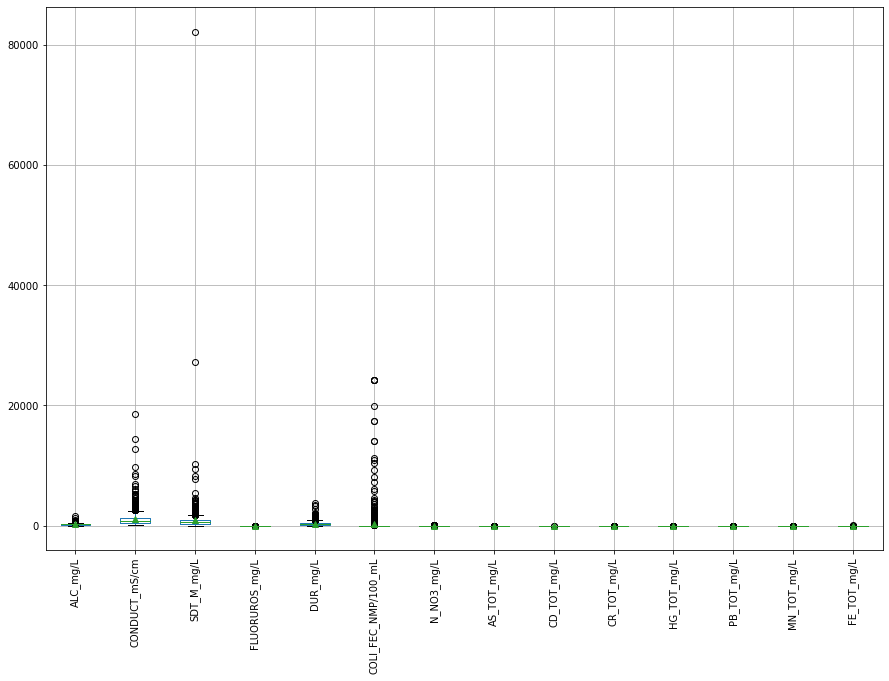

In [72]:
#Graficamos los datos para ver los outliers
outliers = df_float.boxplot(figsize = (15,10),showmeans = True)
outliers.plot()
plt.xticks(rotation=90)
plt.show()

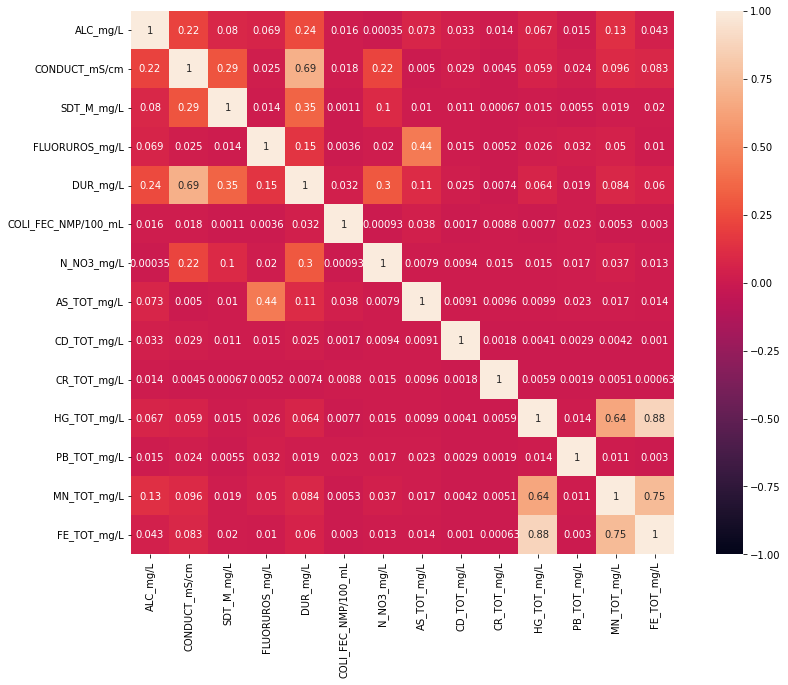

In [73]:
#Se grafica la matriz de correlacion
corr = df_float.corr().abs()
f, ax = plt.subplots(figsize = (15,10)) #Definir el área de trabajo.
sns.heatmap(corr, vmax = 1, vmin = -1, square = True, annot = True)

In [74]:
X = df_float
Y = pd.DataFrame(dfc['SEMAFORO'])

#Cambiamos las clases a numeros
Y['SEMAFORO'] = Y['SEMAFORO'].replace('Verde',1)
Y['SEMAFORO'] = Y['SEMAFORO'].replace('Rojo',2)
Y['SEMAFORO'] = Y['SEMAFORO'].replace('Amarillo',3)

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df_float, Y, test_size=0.3, random_state=1) 
X_train

,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
479,277.500,8680.0,5418.2,1.7301,1361.0232,201.0,4.066524,0.0100,0.003,0.00500,0.00050,0.0133,0.00230,0.04070
635,213.000,736.0,505.0,0.2000,245.3358,1.1,3.220000,0.0100,0.003,0.02342,0.00120,0.0050,0.00165,0.06361
106,110.595,1931.0,1402.0,0.5081,398.9200,1.1,16.082471,0.0163,0.003,0.00500,0.00050,0.0050,0.00150,0.02500
790,60.775,181.7,151.6,0.6747,45.6366,10.0,0.649018,0.0100,0.003,0.00500,0.00050,0.0050,0.00150,0.02610
23,208.050,1376.0,720.8,0.2572,313.1522,3654.0,7.535822,0.0156,0.003,0.00500,0.00149,0.0050,0.02790,1.47000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,233.155,753.0,586.8,0.4618,265.8828,1.1,6.072245,0.0112,0.003,0.00500,0.00050,0.0050,0.00150,0.04910
715,111.000,221.0,176.6,0.2000,73.7040,1.1,0.020000,0.0100,0.003,0.00500,0.00050,0.0050,0.21200,1.94800
905,178.000,1120.0,1700.0,0.2978,701.7669,9.0,8.863363,0.0100,0.003,0.00500,0.00050,0.0050,0.00150,0.02500
235,357.420,966.0,732.6,5.2268,75.6960,1.1,0.225885,0.0421,0.003,0.00500,0.00050,0.0050,0.00150,0.02500


*Desicion Tree*

In [76]:
arbol = DecisionTreeClassifier()
arbol.fit(X_train,Y_train)
nombrefeatures=X.columns
predicciones = arbol.predict(X_test)
accuracyarbol = accuracy_score(Y_test,predicciones)

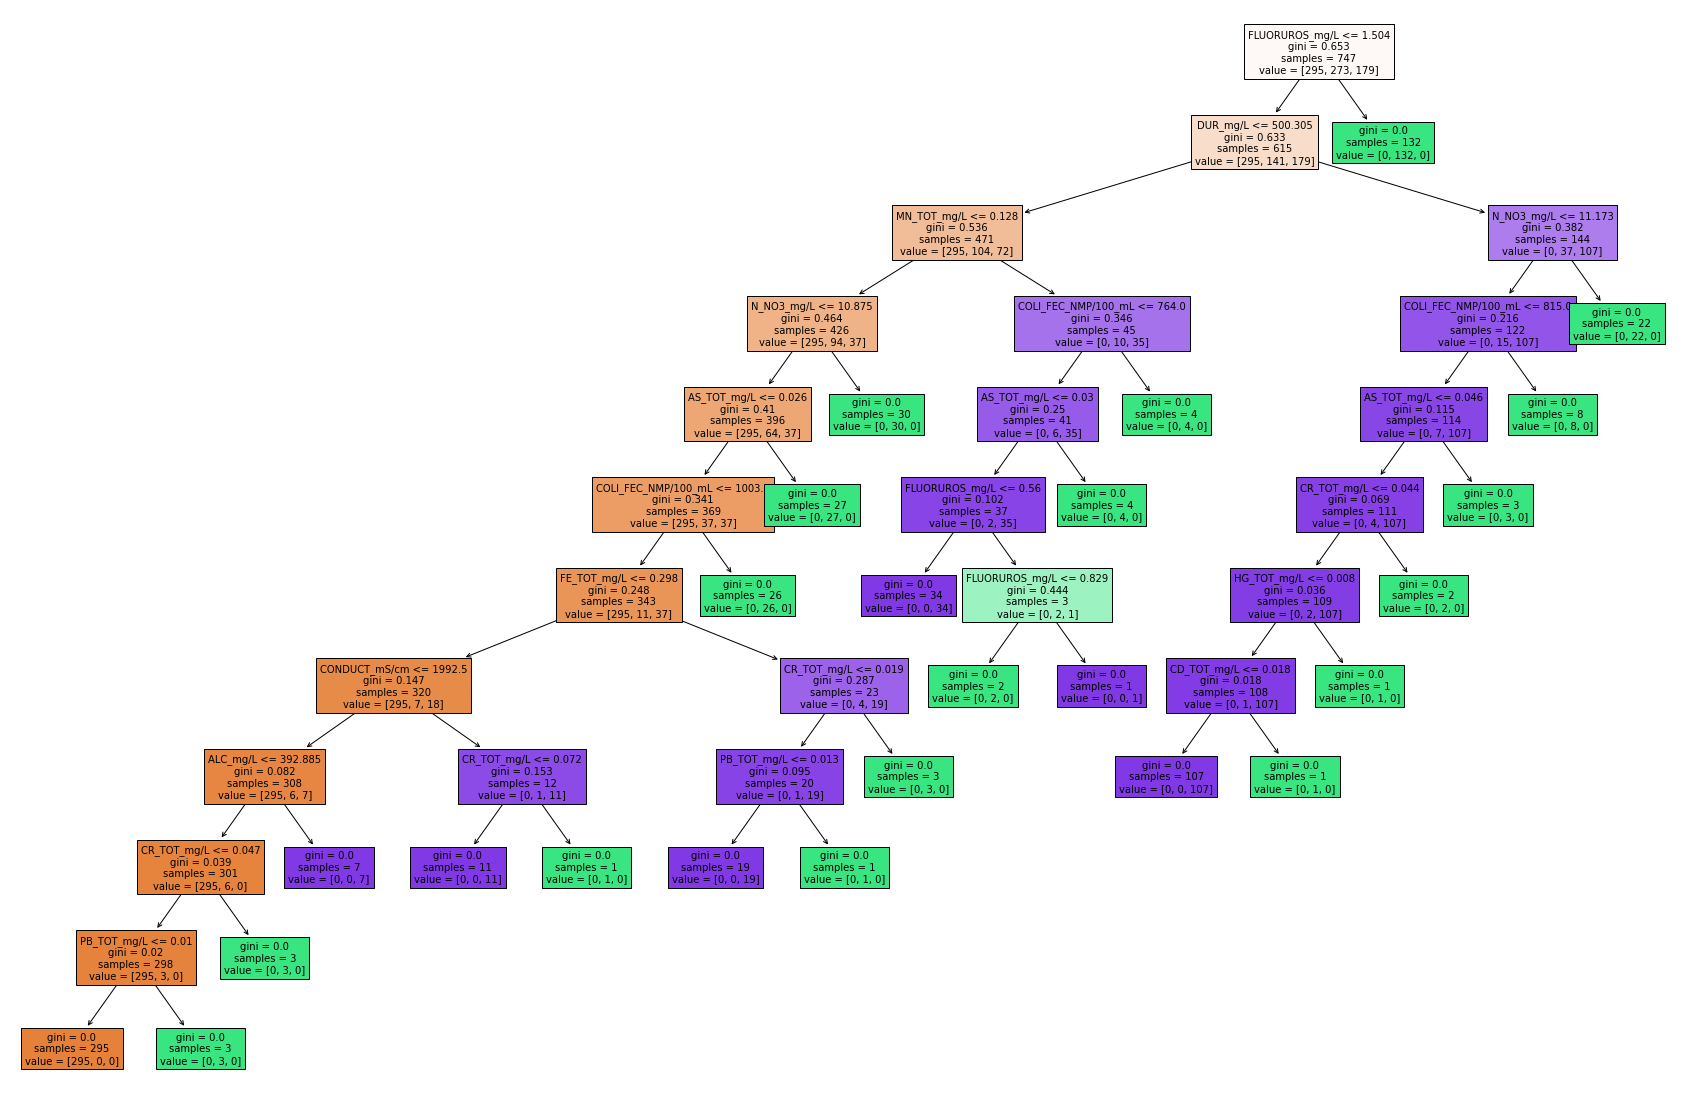

In [77]:
from sklearn import tree
fig = plt.figure(figsize=(30,20))
_ = tree.plot_tree(arbol, feature_names=nombrefeatures, filled=True, fontsize=10)

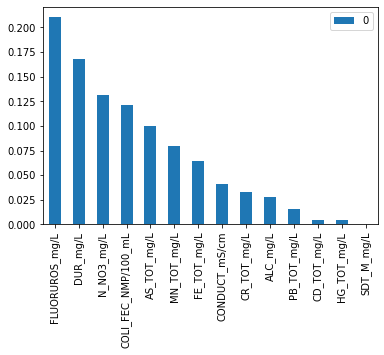

In [78]:
importanciaarbol = pd.DataFrame(arbol.feature_importances_,index=nombrefeatures).sort_values(by=0, ascending=False)
importanciaarbol.plot(kind='bar')

In [79]:
from sklearn.metrics import confusion_matrix
matrizarbol = confusion_matrix(Y_test,predicciones,labels=[1,2,3])

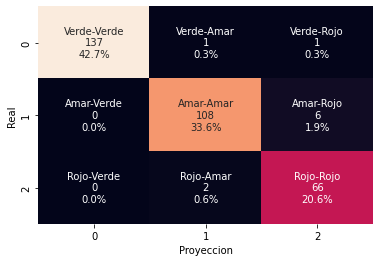

In [80]:
import matplotlib.pyplot as plt
txt = ['Verde-Verde','Verde-Amar','Verde-Rojo',
    'Amar-Verde','Amar-Amar','Amar-Rojo',
    'Rojo-Verde','Rojo-Amar','Rojo-Rojo',]
frecuencia = ["{0:0.0f}".format(value) for value in matrizarbol.flatten()]
porcentaje = ["{0:.1%}".format(value) for value in matrizarbol.flatten()/np.sum(matrizarbol)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(txt,frecuencia,porcentaje)]
labels = np.asarray(labels).reshape(3,3)
labels
ax = sns.heatmap(matrizarbol, annot=labels, fmt='', cbar=False)
ax.set(ylabel="Real", xlabel="Proyeccion")
plt.show()

*Ramdom Forest*

In [81]:
forest = RandomForestClassifier(class_weight='balanced', max_depth=8)
forest.fit(X_train, Y_train)
prediccionesforest = forest.predict(X_test)
accuracyforest = accuracy_score(Y_test,prediccionesforest)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


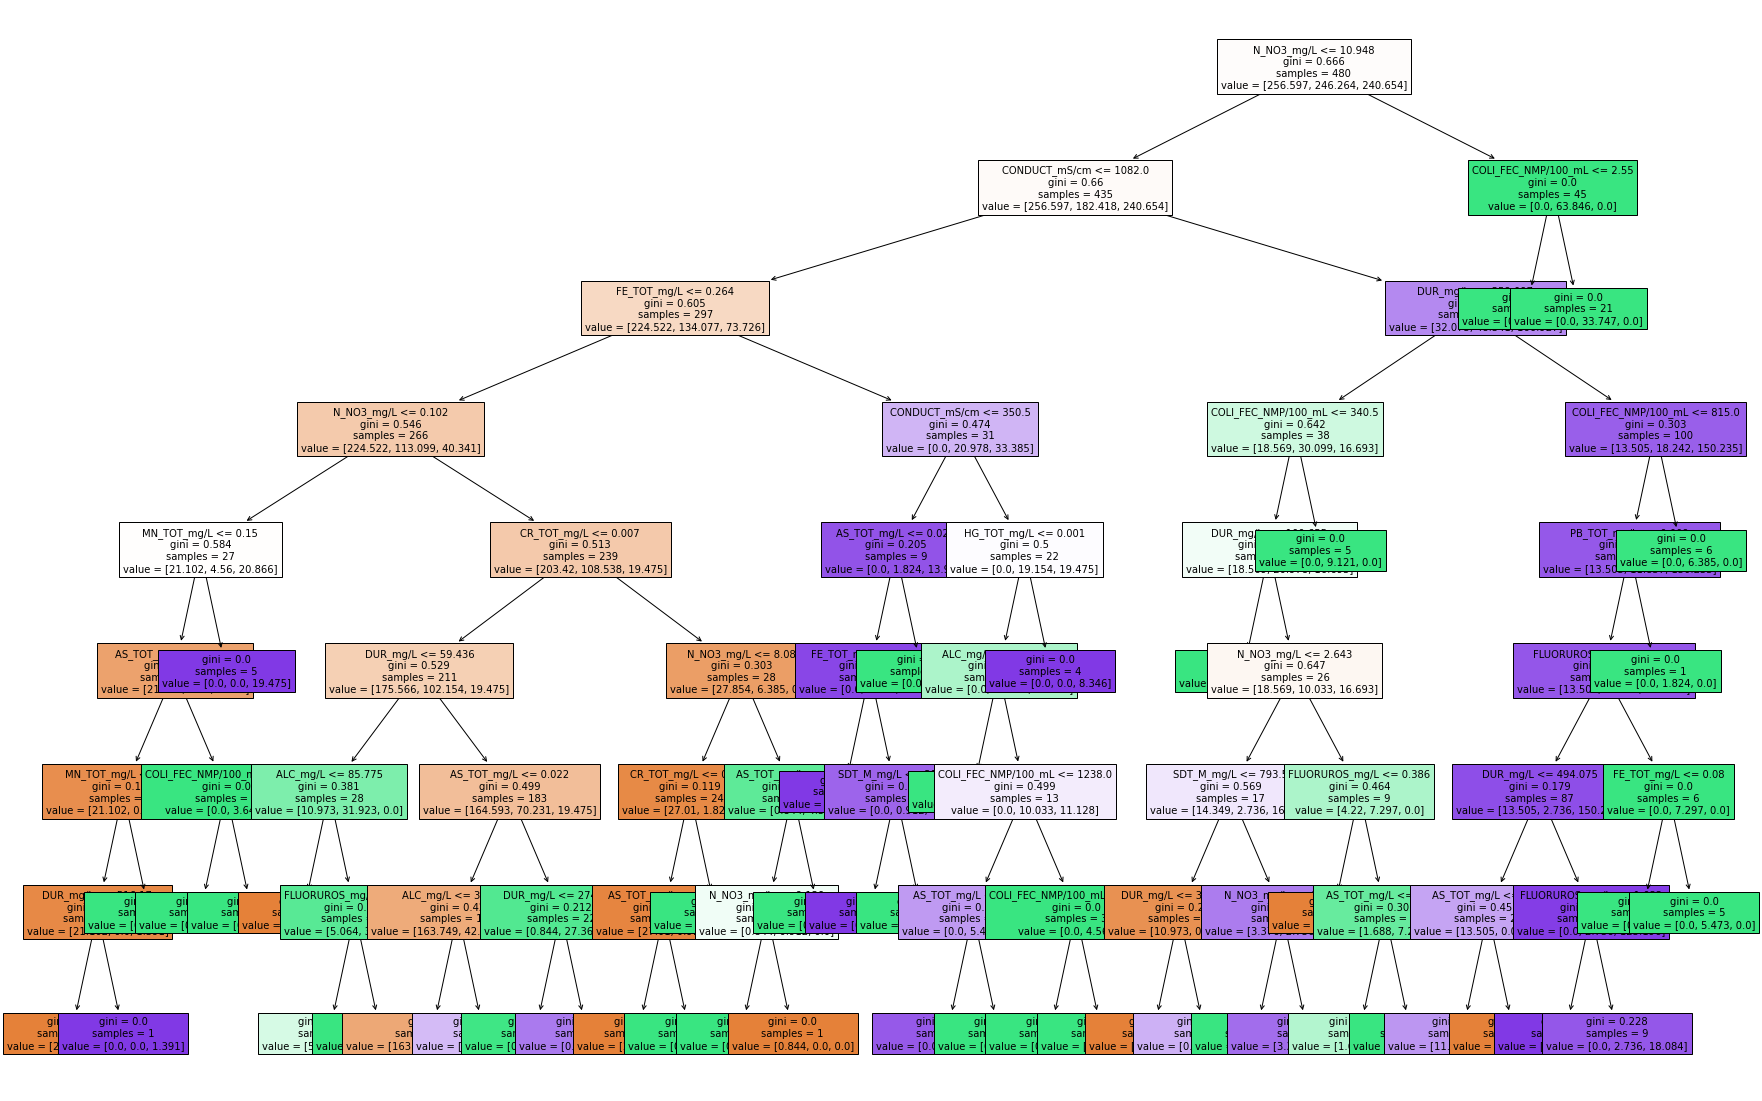

In [82]:
fig = plt.figure(figsize=(30,20))
_ = tree.plot_tree(forest[0], feature_names=nombrefeatures, filled=True, fontsize=10)

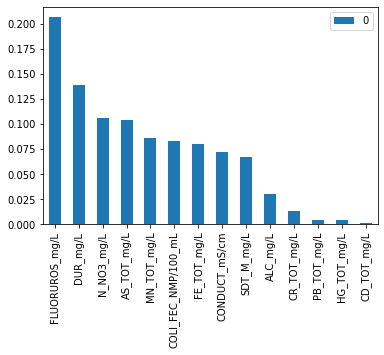

In [83]:
importanciaforest = pd.DataFrame(forest.feature_importances_,index=nombrefeatures).sort_values(by=0, ascending=False)
importanciaforest.plot(kind='bar')

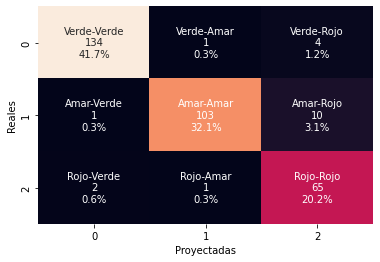

In [84]:
matrizforest = confusion_matrix(Y_test,prediccionesforest,labels=[1,2,3])
matrizforest
txt = ['Verde-Verde','Verde-Amar','Verde-Rojo',
    'Amar-Verde','Amar-Amar','Amar-Rojo',
    'Rojo-Verde','Rojo-Amar','Rojo-Rojo',]
frecuencia = ["{0:0.0f}".format(value) for value in matrizforest.flatten()]
porcentaje = ["{0:.1%}".format(value) for value in matrizforest.flatten()/np.sum(matrizforest)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(txt,frecuencia,porcentaje)]
labels = np.asarray(labels).reshape(3,3)
labels
ax = sns.heatmap(matrizforest, annot=labels, fmt='', cbar=False)
ax.set(ylabel="Reales", xlabel="Proyectadas")
plt.show()

In [86]:
print("Accuracy Desicion Tree :", accuracyarbol)
print("Accuracy Random Forest :", accuracyforest)

Accuracy Desicion Tree : 0.9688473520249221
Accuracy Random Forest : 0.940809968847352
